In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

#### Lendo os datasets

In [2]:
df = pd.read_csv("../data/data_1__.csv", delimiter=",")

In [3]:
df.drop('index', axis=1, inplace=True)

### Transformando os valores de data

In [4]:
df['data'] = pd.to_datetime(df['data'])

In [5]:
df['data'].dt.strftime('%Y-%m-%d').head()

0    2016-08-29
1    2016-08-30
2    2016-08-31
3    2016-09-01
4    2016-09-02
Name: data, dtype: object

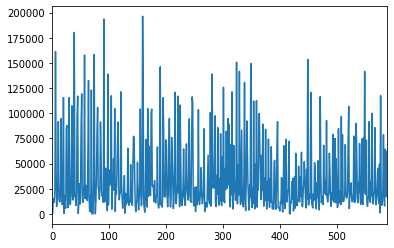

In [6]:
df['valor'].plot();

In [7]:
df['data'].dt.strftime('%Y-%m').unique()

array(['2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01',
       '2017-02', '2017-03', '2017-04', '2017-05', '2017-06', '2017-07',
       '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-01',
       '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07',
       '2018-08', '2018-09', '2018-10'], dtype=object)

### Separando os dados do último mes

In [8]:
dfTest = df[df['data'].dt.strftime('%Y-%m') == ('2018-10')]

In [9]:
dfTrain = df[df['data'].dt.strftime('%Y-%m') != ('2018-10')]

### Transformando data em colunas de ano, mes e dia

In [10]:
vetAnosTreino = dfTrain['data'].dt.strftime('%Y')
vetMesesTreino = dfTrain['data'].dt.strftime('%m')
vetDiasTreino = dfTrain['data'].dt.strftime('%d')

vetAnosTeste = dfTest['data'].dt.strftime('%Y')
vetMesesTeste = dfTest['data'].dt.strftime('%m')
vetDiasTeste = dfTest['data'].dt.strftime('%d')

In [11]:
dicTreino = {"Ano":vetAnosTreino, "Mes":vetMesesTreino, "Dia":vetDiasTreino, "Valor":dfTrain["valor"]}
dicTeste = {"Ano":vetAnosTeste, "Mes":vetMesesTeste, "Dia":vetDiasTeste, "Valor":dfTest["valor"]}

dfTrain = pd.DataFrame(data=dicTreino)
dfTest = pd.DataFrame(data=dicTeste)

### Normalizando os dados

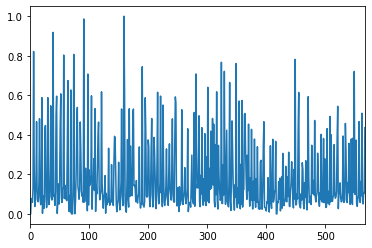

In [12]:
scaler = MinMaxScaler() 
scaled_values = scaler.fit_transform(dfTrain) 
dfTrain.loc[:,:] = scaled_values
dfTrain['Valor'].plot();

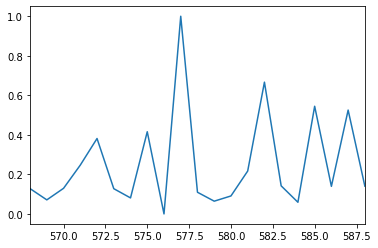

In [13]:
scaled_values = scaler.fit_transform(dfTest) 
dfTest.loc[:,:] = scaled_values
dfTest['Valor'].plot();

### Separando Treino e Teste

In [14]:
X_train = dfTrain.drop('Valor', axis=1)
y_train = dfTrain['Valor']

X_test = dfTest.drop('Valor', axis=1)
y_test = dfTest['Valor']

In [15]:
Vetmae = []
Vetmse = []
Vetrmse = []
modelo = []

## RadomForest

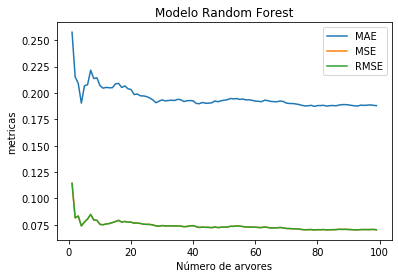

In [16]:
neighbors = np.arange(1, 100)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    rf = RandomForestRegressor(random_state=5, n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo Random Forest')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de arvores')
plt.ylabel('metricas')
plt.show()

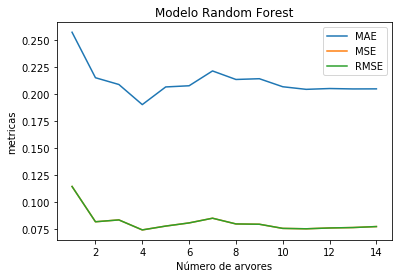

In [17]:
neighbors = np.arange(1, 15)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    rf = RandomForestRegressor(random_state=5, n_estimators=k)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo Random Forest')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de arvores')
plt.ylabel('metricas')
plt.show()

In [18]:
rf = RandomForestRegressor(random_state=5, n_estimators=4)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("RandomForest")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.1903456261669169
MSE: 0.07394671691190136
RMSE: 0.2719314562751087


## KNN

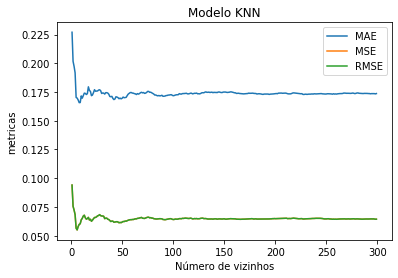

In [19]:
neighbors = np.arange(1, 300)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

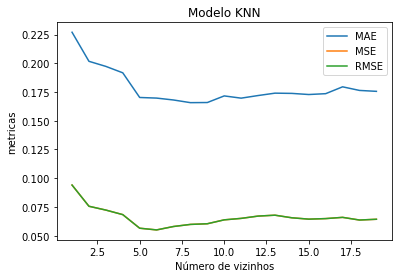

In [20]:
neighbors = np.arange(1, 20)
mae = np.empty(len(neighbors))
mse = np.empty(len(neighbors))
rmse = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    kn = KNeighborsRegressor(n_neighbors=k)
    kn.fit(X_train, y_train)
    y_pred = kn.predict(X_test)
    mae[i] = metrics.mean_absolute_error(y_test, y_pred)
    mse[i] = metrics.mean_squared_error(y_test, y_pred)
    rmse[i] = metrics.mean_squared_error(y_test, y_pred)

# gerando o grafico
plt.title('Modelo KNN')
plt.plot(neighbors, mae, label = 'MAE')
plt.plot(neighbors, mse, label = 'MSE')
plt.plot(neighbors, rmse, label = 'RMSE')
plt.legend()
plt.xlabel('Número de vizinhos')
plt.ylabel('metricas')
plt.show()

In [21]:
kn = KNeighborsRegressor(n_neighbors=5)
kn.fit(X_train, y_train)
y_pred = kn.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("KNN")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.1702371486169089
MSE: 0.05650535680360325
RMSE: 0.2377085543340905


### BayesianRidge

In [22]:
reg = linear_model.BayesianRidge()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Bayesian")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.17342611048050072
MSE: 0.06472530139898956
RMSE: 0.25441167700989975


### LinearRegression

In [23]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('MAE:', mae)  
print('MSE:', mse)  
print('RMSE:', rmse)

modelo.append("Linear Regression")
Vetmae.append(mae)
Vetmse.append(mse)
Vetrmse.append(rmse)

MAE: 0.17389465505195154
MSE: 0.06467742044667661
RMSE: 0.25431755827444674


In [24]:
modelo

['RandomForest', 'KNN', 'Bayesian', 'Linear Regression']

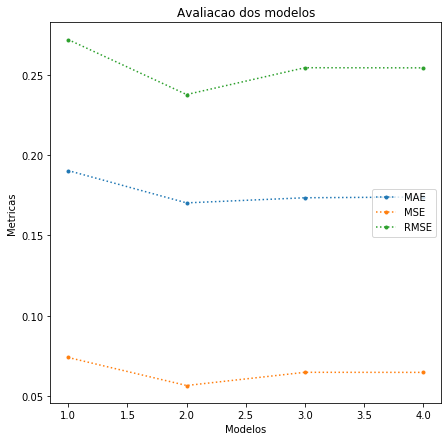

In [25]:
modelos = np.arange(1, len(modelo)+1)

plt.figure(figsize=[7,7])
plt.title('Avaliacao dos modelos')
plt.plot(modelos, Vetmae, ':.', label = 'MAE')
plt.plot(modelos, Vetmse, ':.', label = 'MSE')
plt.plot(modelos, Vetrmse,':.', label = 'RMSE')
plt.legend(loc='right')
plt.xlabel('Modelos')
plt.ylabel('Metricas')
plt.show()